## Оглавление
1. [Изучение данных из файла](#data_studying)
2. [Предобработка данных](#pre_processing)
3. [Расчёты и добавление результатов в таблицу](#calculation)
4. [Исследовательский анализ данных](#analysis)
  - [4.1. Задача 1](#first_issue)
  - [4.2. Задача 2](#second_issue)
  - [4.3. Задача 3](#third_issue)
  - [4.4. Задача 4](#fourth_issue)
  - [4.5. Задача 5](#fifth_issue)
  - [4.6. Задача 6](#sixth_issue)
  - [4.7. Задача 7](#seventh_issue)
5. [Общий вывод](#sumup)

# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — установить параметры, чтобы построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Ход исследования**

Перед проверкой гипотез понадобится обзор данных. 

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем мы устраним пробемы в данных: обработаем артефакты, заполним пропуски, категоризируем данные, изменим тип данных при необходимости и проведем исследовательский анализ.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ:
   * изучение площади, цены, числа комнат, высоты потолков, времени продажи квартиры, а также влияния данных факторов на стоимость квартиры;
   * на основании данных о расположении квартир мы выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья;
   * проанализируем данные о квартирах в центре города и изучим следующие параметры: площадь, цена, число комнат, высота потолков;
   * выделим факторы, которые влияют на стоимость квартиры.


## 1. Изучение данных из файла
<a name="data_studying"></a>

Изучим входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

In [906]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [907]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10) # выведем 10 первых строк таблицы



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [908]:
# выведем сводную информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В каждой строке таблицы — данные о квартире на продажу, по каждой из которых доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Предварительно можно утверждать, что данных достаточно для выполнения задачи. Но встречаются пропуски в данных, артефакты, а также явные и неявные дубликаты.

Чтобы двигаться дальше, нужно устранить проблемы в данных.



## 2. Предобработка данных
<a name="pre_processing"></a>

In [909]:
# заменим тип данных для столбцов first_day_exposition и is_apartment
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S') # дату на datetime64, т.к. это дата
data['is_apartment'] = data['is_apartment'].astype('bool') # is_apartment на bool, т.к. это логические данные с двумя вариантами ответа

data.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [910]:
# проверим количество пропущенных значений
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [911]:
# посчитаем долю пропусков в столбцах
data.isna().mean()


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [912]:
# заполним пропуски в колонке ceiling_height медианным значением по столбцу
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
data['ceiling_height'].isna().sum() # проверим результат

0

In [913]:
# заполним отсутствующие значения в столбце floors_total данными об этаже, на котором расположена квартира
data['floors_total'] = data['floors_total'].fillna(data['floor']) 
data['floors_total'].isna().sum() # проверим результат


0

In [914]:
# доля пропущенных значений в столбце 'living_area' 8%, поэтому удалим эти строки
data = data.dropna(subset=['living_area'])
data['living_area'].isna().sum() # проверим результат


0

In [915]:
# доля пропущенных значений в столбце 'kitchen_area' 10%, 
# поэтому заменим отсутствующие значения на минимальную площадь кухни по СанПин - 8 кв.м.
data = data.fillna({'kitchen_area': 0})
data['kitchen_area'].isna().sum() # проверим результат

0

In [916]:
# заменим пропущенные значения в столбце balcony на 0, т.к. скорее всего в таких квартирах нет балкона, 
# и пользователи не заполнили это поле
data = data.fillna({'balcony': 0})
display(data['balcony'].isna().sum()) # проверим результат

0

In [917]:
display(data['locality_name'].isna().mean()) # доля пропущенных значений в столбце 'locality_name' 0,2%, поэтому удалим эти строки
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum() # проверим результат

0.002018719031014865

0

In [918]:
data['airports_nearest'].isna().mean() # доля пропущенных значений в столбце 'airports_nearest' 23%

# данных в таблице недостаточно, чтобы заполнить эти пропуски, удаление приведет к большой потере данных,
# поэтому оставим значения пропущенными


0.22572636998896653

In [919]:
data['cityCenters_nearest'].isna().mean() # доля пропущенных значений в столбце 'cityCenters_nearest' 23%

# данных в таблице недостаточно, чтобы заполнить эти пропуски, удаление приведет к большой потере данных,
# поэтому оставим значения пропущенными

0.2247609415226186

In [920]:
display(data['parks_around3000'].isna().mean()) # доля пропущенных значений в столбце 'parks_around3000' 23%  
display(data['ponds_around3000'].isna().mean()) # доля пропущенных значений в столбце 'ponds_around3000' 23%

# заменим пропущенные значения в столбцах parks_around3000 и ponds_around3000 на 0, т.к. скорее всего эти данные 
# получены автоматически на основе картографических данных, и на этом расстоянии нет парков и водоемов
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

display(data['parks_around3000'].isna().mean()) # проверим результат
data['ponds_around3000'].isna().mean()

0.2247149687385068

0.2247149687385068

0.0

0.0

In [921]:
display(data['parks_nearest'].isna().mean()) # доля пропущенных значений в столбце'parks_nearest' 66%
data['ponds_nearest'].isna().mean() # доля пропущенных значений в столбце 'ponds_nearest' 61%

# данных в таблице недостаточно, чтобы заполнить эти пропуски, удаление приведет к большой потере данных,
# поэтому оставим значения пропущенными

0.6557557925707981

0.6142423685178374

In [922]:
# доля пропущенных значений в столбце 'days_exposition' 14%
# проанализируем распределение пропусков в данном столбце во времени относительно дня выставления квартиры на продажу, 
# чтобы понять, являются ли пропуски случайными и можем ли мы их заполнить нулями
pd.options.mode.chained_assignment = None
expos = data[['first_day_exposition','days_exposition']]
expos['year'] = expos.loc[:, 'first_day_exposition'].dt.year # добавим год и месяц 
expos['month_year'] = expos.loc[:,'first_day_exposition'].astype('datetime64[M]')

<Axes: xlabel='year'>

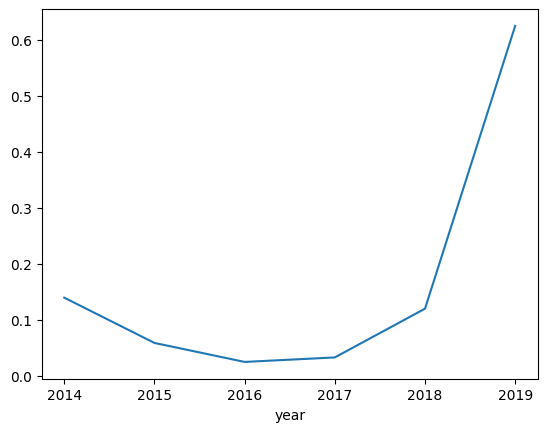

In [923]:
# обозначим пропущенные значения единицей, а заполненные нулем
def typ(value):
  if value >= 0:
    value = 0
  else:
    value = 1
  return value

expos['new'] = expos['days_exposition'].apply(typ)

#построим график распределения по годам
expos.groupby('year')['new'].mean().plot(kind = 'line')

<Axes: xlabel='month_year'>

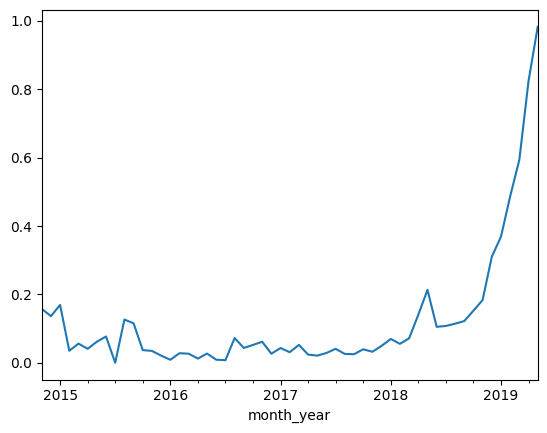

In [924]:
#посмотрим на распределение по месяцам
expos.groupby('month_year')['new'].mean().plot(kind = 'line')

Распределение выглядит равномерным, кроме явного всплеска в 2019 году, что уже не выглядит случайным, поэтому оставим пропущенные данные незаполненными.

## 3. Расчёты и добавление результатов в таблицу
<a name="calculation"></a>

In [925]:
# добавим стобец со стоимостью квадратного метра жилья
data['square_meter'] = (data['last_price']/data['total_area']).astype('float').round(2)
data.head() # проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,...,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.79


In [926]:
# добавим день недели, месяц и год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].astype('datetime64[M]')
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

# добавим буквенный формат дня недели
def dayweek(day):
    if day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    elif day == 6:
        return 'воскресенье'
    
data['dayofweek'] = data['day'].apply(dayweek)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,year,month,day,dayofweek
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.37,2019,2019-03-01,3,четверг
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,2018,2018-12-01,1,вторник
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.71,2015,2015-08-01,3,четверг
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.00,2018,2018-06-01,1,вторник
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,...,0.0,NaN,0.0,NaN,55.0,95065.79,2018,2018-09-01,0,понедельник


In [927]:
# создадим колонку для категоризации этажности зданий
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

data['floor_category'] = data.apply(floor_category, axis=1)

data.head() # проверим результат


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,year,month,day,dayofweek,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,2019,2019-03-01,3,четверг,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,2018,2018-12-01,1,вторник,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,2015,2015-08-01,3,четверг,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,2018,2018-06-01,1,вторник,Другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,...,NaN,0.0,NaN,55.0,95065.79,2018,2018-09-01,0,понедельник,Другой


In [928]:
# определим соотношение жилой и общей площади, а также отношение площади кухни к общей

data['living_to_total_area'] = (data['living_area']/data['total_area']).round(2)
data['kitchen_to_total_area'] = (data['kitchen_area']/data['total_area']).round(2)
data.head() # проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter,year,month,day,dayofweek,floor_category,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,755.0,NaN,120370.37,2019,2019-03-01,3,четверг,Другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,NaN,81.0,82920.79,2018,2018-12-01,1,вторник,Первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,574.0,558.0,92785.71,2015,2015-08-01,3,четверг,Другой,0.61,0.15
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,48.0,121.0,100000.00,2018,2018-06-01,1,вторник,Другой,0.32,0.41
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,...,NaN,55.0,95065.79,2018,2018-09-01,0,понедельник,Другой,0.47,0.30


## 4. Исследовательский анализ данных
<a name="analysis"></a>

### 4.1. Задача
<a name="first_issue"></a>
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

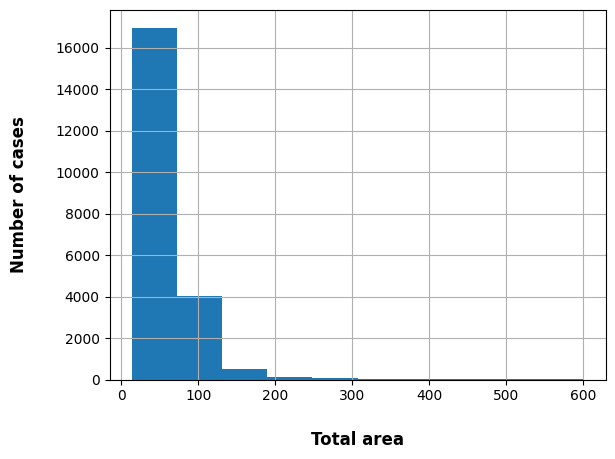

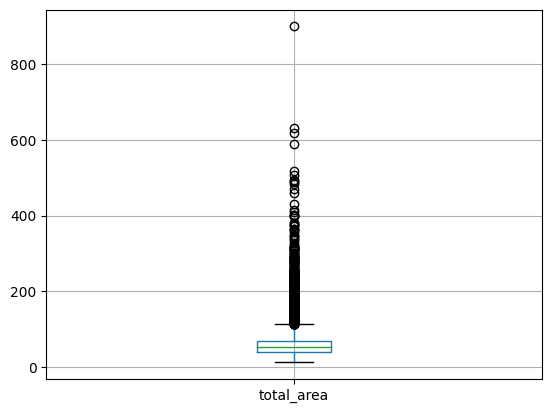

In [929]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков

ax = data.hist(column='total_area', bins=10, range=(14, 600)) # построим гистограмму

ax = ax[0]
for x in ax:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Total area", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cases", labelpad=20, weight='bold', size=12)



plt.show()
data.boxplot(column='total_area') # построим диаграмму размаха

plt.show()

# на графиках видно, что основная часть квартир имеет площадь не более 100 кв.м., 
# однако, диаграмма размаха показывает, что есть достаточно большое количество квартир площадью до 400 кв.м., 
# а также ряд вариантов до 600, и даже одна 900 кв.м. 
# Ограничим гистограмму вариантом в 600 кв.м.



In [930]:
# проверка на аномалии столбца 'total_area' выявила, что в данных есть две квартиры площадью 12 и 13 кв.м.
display(data['total_area'].sort_values(ascending=False))

# согласно требования СанПин для однокомнатной квартиры площадь единственной комнаты не может быть менее 14 квадратных метров
# Изменим площадь "выбивающихся" вариантов 
def min_total_area(row):
    if row['total_area'] < 14:
        row['total_area'] = 14
    return row['total_area']

data['total_area'] = data.apply(min_total_area, axis=1)


data = data.loc[data['total_area'] < 500] # удалим выбивающиеся значения
display(data['total_area'].sort_values(ascending = False)) # проверим результат

19540    900.0
12859    631.2
15651    618.0
5358     590.0
4237     517.0
         ...  
9412      16.0
8886      15.5
19642     14.0
19807     13.0
19904     12.0
Name: total_area, Length: 21752, dtype: float64

12401    495.0
22494    491.0
6621     488.0
660      483.9
6221     470.3
         ...  
9412      16.0
8886      15.5
19904     14.0
19807     14.0
19642     14.0
Name: total_area, Length: 21746, dtype: float64

12190.0

763000000.0

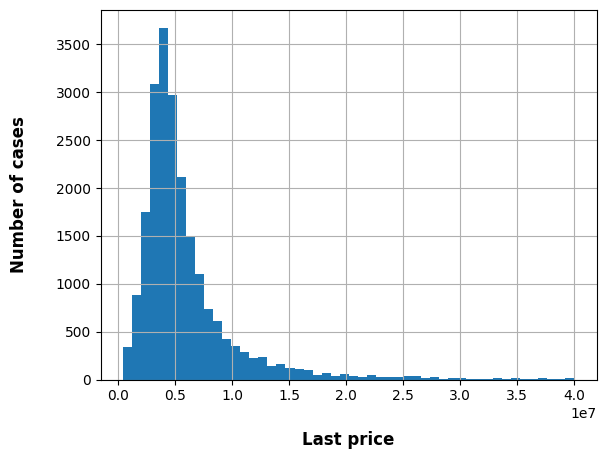

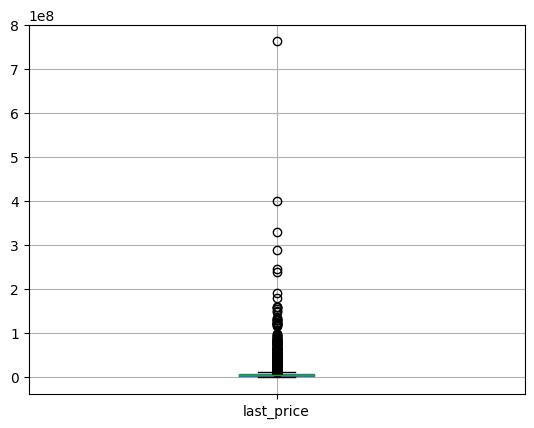

In [931]:
# проверим на аномалии столбец 'last_price'
display(data['last_price'].min())
display(data['last_price'].max())
price = data.hist(column='last_price', bins=50, range=(430000, 40000000)) # построим гистограмму
price = price[0]
for x in price:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Last price", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cases", labelpad=20, weight='bold', size=12)
    
plt.show()
data.boxplot(column='last_price') # построим диаграмму размаха
plt.show()

# Большинство квартир стоит около 5 млн.руб.



In [932]:
# проверим на аномалии
display(data['last_price'].sort_values(ascending=False))

# Заметны два выбивающихся значения, удалим самый дорогой вариант
data = data.drop(labels = [12971],axis = 0)

12971    763000000.0
14706    401300000.0
1436     330000000.0
22831    289238400.0
16461    245000000.0
            ...     
17676       450000.0
9581        450000.0
5698        450000.0
17456       430000.0
8793         12190.0
Name: last_price, Length: 21746, dtype: float64

In [933]:
display(data.loc[8793]) # проверим строку с низкой ценой
# квартира с такими параметрами не может стоить так дешево, удалим эту строку
data = data.drop(labels = [8793],axis = 0)
data['last_price'].sort_values(ascending=False) # проверим результат

total_images                               7
last_price                           12190.0
total_area                             109.0
first_day_exposition     2019-03-20 00:00:00
rooms                                      2
ceiling_height                          2.75
floors_total                            25.0
living_area                             32.0
floor                                     25
is_apartment                            True
studio                                 False
open_plan                              False
kitchen_area                            40.5
balcony                                  0.0
locality_name                Санкт-Петербург
airports_nearest                     36421.0
cityCenters_nearest                   9176.0
parks_around3000                         1.0
parks_nearest                          805.0
ponds_around3000                         0.0
ponds_nearest                            NaN
days_exposition                          8.0
square_met

14706    401300000.0
1436     330000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
            ...     
23484       470000.0
17676       450000.0
9581        450000.0
5698        450000.0
17456       430000.0
Name: last_price, Length: 21744, dtype: float64

19

0

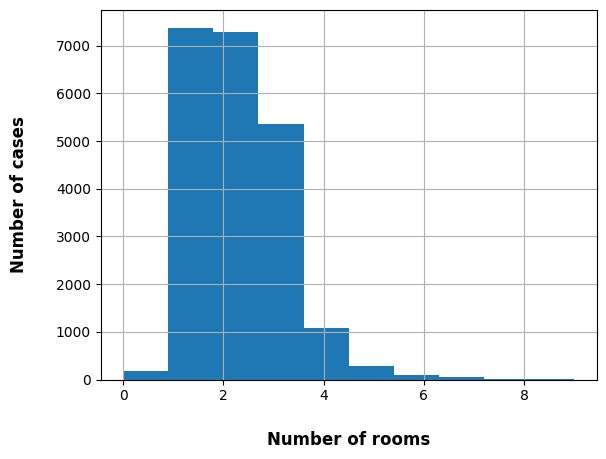

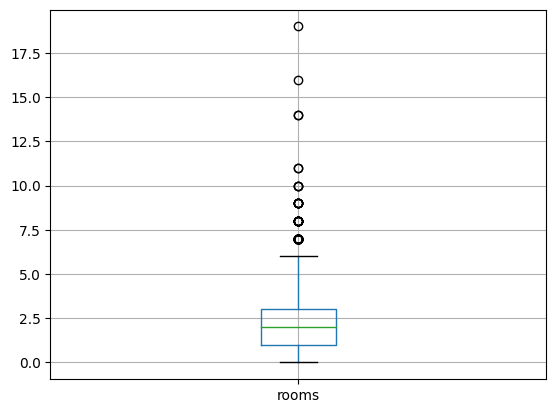

In [934]:
# проверим на аномалии столбец 'rooms'
display(data['rooms'].max())
display(data['rooms'].min())
rooms = data.hist(column='rooms', bins=10, range=(0, 9)) # построим гистограмму
rooms = rooms[0]
for x in rooms:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Number of rooms", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cases", labelpad=20, weight='bold', size=12)
plt.show()
data.boxplot(column='rooms') # построим диаграмму размаха
plt.show()

# Графики указывают на то, что вариантов с более чем 6 комнатами очень мало.
# В большей части квартир от 1 до 3 комнат

In [935]:
# проверим на аномалии столбец 'rooms'
display(data['rooms'].sort_values(ascending=False)) 

# рассмотрим подробнее строки с нулевым количеством комнат
# скорее всего это квартиры-студии, в которых действительно нет отдельных комнат 
# это подтверждает и тот факт, что их средняя площадь 27 кв.м.
data.query('rooms == 0').pivot_table(index='rooms', columns='studio', values='total_area', aggfunc=['mean', 'median'])

14498    19
18848    16
866      14
20829    14
648      11
         ..
4115      0
15714     0
15712     0
10720     0
8886      0
Name: rooms, Length: 21744, dtype: int64

mean            median        
studio      False       True  False    True
rooms                                      
0       26.915091  27.955313   26.1  26.025

In [936]:
# изменим для этих строк значение столбца 'studio' на True
def bool_room(row):
    rooms = row['rooms']
    studio = row['studio']
    if rooms == 0:
        studio = True
    return studio
    
data['studio'] = data.apply(bool_room, axis=1)


In [937]:
# проверим результат
len(data.query('rooms == 0 and studio == False'))

0

100.0

1.0

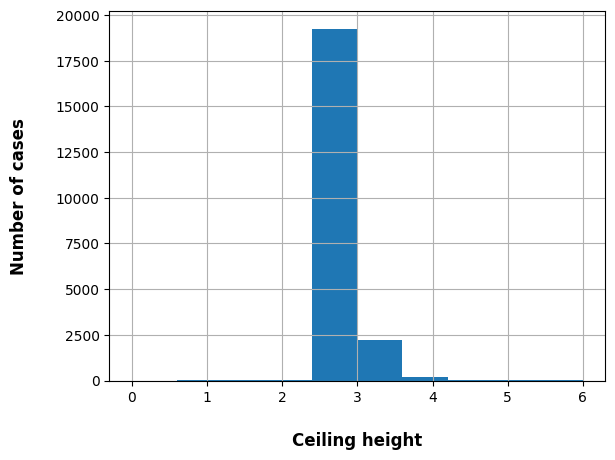

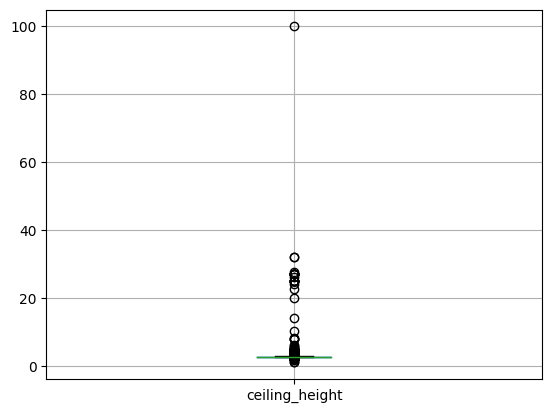

In [938]:
# проверим на аномалии столбец 'ceiling_height'
display(data['ceiling_height'].max())
display(data['ceiling_height'].min())

ceiling_height = data.hist(column='ceiling_height', bins=10, range=(0, 6)) # построим гистограмму
ceiling_height = ceiling_height[0]
for x in ceiling_height:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Ceiling height", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cases", labelpad=20, weight='bold', size=12)
    
plt.show()
data.boxplot(column='ceiling_height') # построим диаграмму размаха
plt.show()

# Диаграммы показывают, что в основном высота потолков варьируется в диапазоне 2,5 - 3 метра

In [939]:
# Сортировка столбца 'ceiling_height' показывает, что в данных есть аномальные значения
display(data['ceiling_height'].sort_values(ascending=False))


22869    100.00
3148      32.00
22336     32.00
21377     27.50
10773     27.00
          ...  
16446      2.00
19098      2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 21744, dtype: float64

In [940]:
# заполним слишком большие и слишком маленькие значения медианным значением по столбцу

def ceiling_height_fill(row):
    ceiling_height_median = data['ceiling_height'].median()
    ceiling_height = row['ceiling_height']
    if ceiling_height > 4 or ceiling_height < 2.5:
        ceiling_height = ceiling_height_median
    return ceiling_height

data['ceiling_height'] = data.apply(ceiling_height_fill, axis=1)

data['ceiling_height'].sort_values(ascending=False) # проверим результат



12865    4.0
8713     4.0
12900    4.0
22083    4.0
14001    4.0
        ... 
10116    2.5
10107    2.5
19987    2.5
19988    2.5
23698    2.5
Name: ceiling_height, Length: 21744, dtype: float64

### 4.2. Задача
<a name="second_issue"></a>
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    18764.000000
mean       184.733106
std        221.195277
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

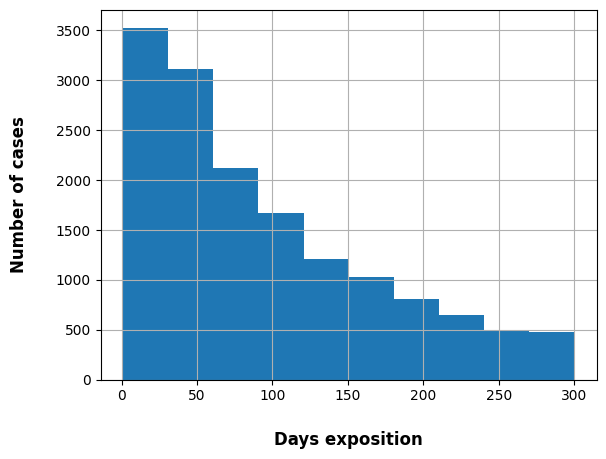

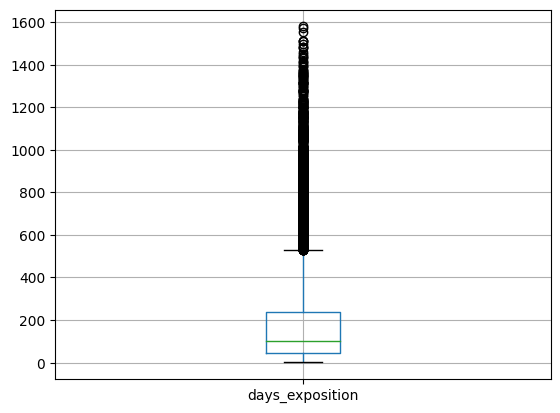

In [941]:
display(data['days_exposition'].describe())

days_exposition = data.hist(column='days_exposition', bins=10, range=(1, 300)) # построим гистограмму
days_exposition = days_exposition[0]
for x in days_exposition:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Days exposition", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of cases", labelpad=20, weight='bold', size=12)
plt.show()
data.boxplot(column='days_exposition') # построим диаграмму размаха
plt.show()


Медианное время продажи квартиры 101 день, однако среднее — 185 дней. Этот показатель отличается от медианного из-за аномально высоких максимальных показателей. Большинство квартир продается за первые 30-60 дней, затем этот показатель постепенно уменьшается.
В то же время, согласно диаграмме рассеяния, существует достаточно большое количество вариантов, продажа которых заняла от 450 до 1400 дней.

### 4.3. Задача
<a name="third_issue"></a>
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [942]:
# проверим на аномалии столбец 'days_exposition'
display(data['days_exposition'].sort_values(ascending=False)) # аномалий нет

18843    1580.0
1109     1572.0
9553     1553.0
1885     1513.0
20969    1512.0
          ...  
23684       NaN
23685       NaN
23694       NaN
23696       NaN
23698       NaN
Name: days_exposition, Length: 21744, dtype: float64

In [943]:
# проверим на аномалии столбец 'total_images'
data['total_images'].sort_values(ascending=False) # аномалий нет

12667    50
17396    50
9778     50
15157    42
1058     39
         ..
3072      0
15144     0
15168     0
15182     0
7062      0
Name: total_images, Length: 21744, dtype: int64

In [944]:
# проверим на аномалии столбец 'first_day_exposition'
data['first_day_exposition'].sort_values(ascending=False) # аномалий нет

13993   2019-05-03
8170    2019-05-03
21887   2019-05-03
12343   2019-05-03
17551   2019-05-03
           ...    
3486    2014-11-27
3291    2014-11-27
16159   2014-11-27
3955    2014-11-27
15427   2014-11-27
Name: first_day_exposition, Length: 21744, dtype: datetime64[ns]

In [945]:
# проверим на аномалии столбец 'floors_total'
data['floors_total'].sort_values(ascending=False) # аномалий нет

2253     60.0
16731    52.0
16934    37.0
11079    36.0
397      36.0
         ... 
11641     1.0
237       1.0
17744     1.0
21603     1.0
8335      1.0
Name: floors_total, Length: 21744, dtype: float64

In [946]:
# проверим на аномалии столбец 'living_area'
display(data['living_area'].sort_values(ascending=False)) # в таблице есть квартиры с жилой площадью 2-5 кв. метров. Это нереалистично

# согласно требования СанПин для однокомнатной квартиры площадь единственной комнаты не может быть менее 14 квадратных метров
# Увеличим площадь до минимальной
def min_living_area(row):
    if row['living_area'] < 14:
        row['living_area'] = 14
    return row['living_area']

data['living_area'] = data.apply(min_living_area, axis=1)

data['living_area'].min() # проверим результат

12401    347.5
660      312.5
14088    300.0
20273    279.6
22494    274.0
         ...  
17582      5.0
23574      3.0
3242       3.0
21758      2.0
13915      2.0
Name: living_area, Length: 21744, dtype: float64

14.0

In [947]:
# проверим на аномалии столбец 'floor'
data['floor'].sort_values(ascending=False) # аномалий нет

18218    33
11575    32
18629    31
1917     30
11079    29
         ..
10790     1
18820     1
18821     1
10784     1
23698     1
Name: floor, Length: 21744, dtype: int64

In [948]:
# проверим на аномалии столбец 'is_apartment'
data['is_apartment'].unique() # аномалий нет

array([ True, False])

In [949]:
# проверим на аномалии столбец 'studio'
data['studio'].unique() # аномалий нет

array([False,  True])

In [950]:
# проверим на аномалии столбец 'open_plan'
data['open_plan'].unique() # аномалий нет

array([False,  True])

In [951]:
# проверим на аномалии столбец 'kitchen_area'
display(data['kitchen_area'].sort_values(ascending=False)) # в списке есть кухни площадью 1-2 кв.м. Это нереалистично

# заменим слишком маленькие значения на минимальную площадь кухни по СанПин в 8 кв.м.
def min_kitchen_area(row):
    if row['kitchen_area'] < 8:
        row['kitchen_area'] = 8
    return row['kitchen_area']

data['kitchen_area'] = data.apply(min_kitchen_area, axis=1)

data['kitchen_area'].sort_values(ascending=False) # проверим результат

20215    107.0
2489     100.7
16239     93.2
16797     93.0
10867     87.2
         ...  
10442      0.0
11331      0.0
18328      0.0
18330      0.0
10729      0.0
Name: kitchen_area, Length: 21744, dtype: float64

20215    107.0
2489     100.7
16239     93.2
16797     93.0
10867     87.2
         ...  
16383      8.0
7326       8.0
16387      8.0
7323       8.0
11829      8.0
Name: kitchen_area, Length: 21744, dtype: float64

In [952]:
# проверим на аномалии столбец 'balcony'
display(data['balcony'].unique()) # аномалий нет


array([0., 2., 1., 5., 4., 3.])

In [953]:
# проверим на аномалии столбец 'locality_name'
data['locality_name'].unique() 
# В столбце есть неявные дубликаты

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [954]:
data['locality_name'] = data['locality_name'].astype('str') # приведем значения к типу str

# заменим неявные дубликаты
def locality(row):
    if 'Янин' in row['locality_name']:
        return 'Янино-1'
    elif 'Мурин' in row['locality_name']:
        return 'Мурино'
    elif 'Кудров' in row['locality_name']:
        return 'Кудрово'
    elif 'Фёдоровско' in row['locality_name']:
        return 'Фёдоровское'
    elif 'Лебяжь' in row['locality_name']:
        return 'Лебяжье'
    elif 'Кузьмоловски' in row['locality_name']:
        return 'Кузьмоловский'
    elif 'Аннин' in row['locality_name']:
        return 'Аннино'
    elif 'Никольско' in row['locality_name']:
        return 'Никольское'
    elif 'Новый Све' in row['locality_name']:
        return 'Новый Свет'
    elif 'Бугр' in row['locality_name']:
        return 'Бугры'
    elif 'Рощин' in row['locality_name']:
        return 'Рощино'
    elif 'Павлов' in row['locality_name']:
        return 'Павлово'
    elif 'Красный Бо' in row['locality_name']:
        return 'Красный Бор'
    elif 'Терволов' in row['locality_name']:
        return 'Терволово'
    elif 'Токсов' in row['locality_name']:
        return 'Токсово'
    return row['locality_name']
 
data['locality_name'] = data.apply(locality, axis=1)

data['locality_name'].unique() # проверим результат

array(['Санкт-Петербург', 'посёлок Шушары', 'Янино-1',
       'посёлок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Колпино', 'Гатчина',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой', 'Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'Кузьмоловский', 'садовое товарищество Новая Ропша', 'Павлово',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       'поселок Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отр

In [955]:
# проверим на аномалии столбец 'airports_nearest'
data['airports_nearest'].sort_values(ascending=False) # аномалий нет

9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: airports_nearest, Length: 21744, dtype: float64

In [956]:
# проверим на аномалии столбец 'cityCenters_nearest'
data['cityCenters_nearest'].sort_values(ascending=False) # аномалий нет

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
          ...   
23683        NaN
23692        NaN
23695        NaN
23696        NaN
23698        NaN
Name: cityCenters_nearest, Length: 21744, dtype: float64

In [957]:
# проверим на аномалии столбец 'parks_around3000' и 'ponds_around3000'
display(data['parks_around3000'].sort_values(ascending=False))  # аномалий нет
data['ponds_around3000'].sort_values(ascending=False) # аномалий нет

16539    3.0
464      3.0
1187     3.0
2036     3.0
23382    3.0
        ... 
9516     0.0
9519     0.0
9521     0.0
9522     0.0
23698    0.0
Name: parks_around3000, Length: 21744, dtype: float64

3276     3.0
21112    3.0
9503     3.0
15847    3.0
21129    3.0
        ... 
9764     0.0
9765     0.0
9766     0.0
9767     0.0
23698    0.0
Name: ponds_around3000, Length: 21744, dtype: float64

In [958]:
data.duplicated().sum() # проверим количество явных дубликатов в таблице

0

### 4.4. Задача
<a name="fourth_issue"></a>
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

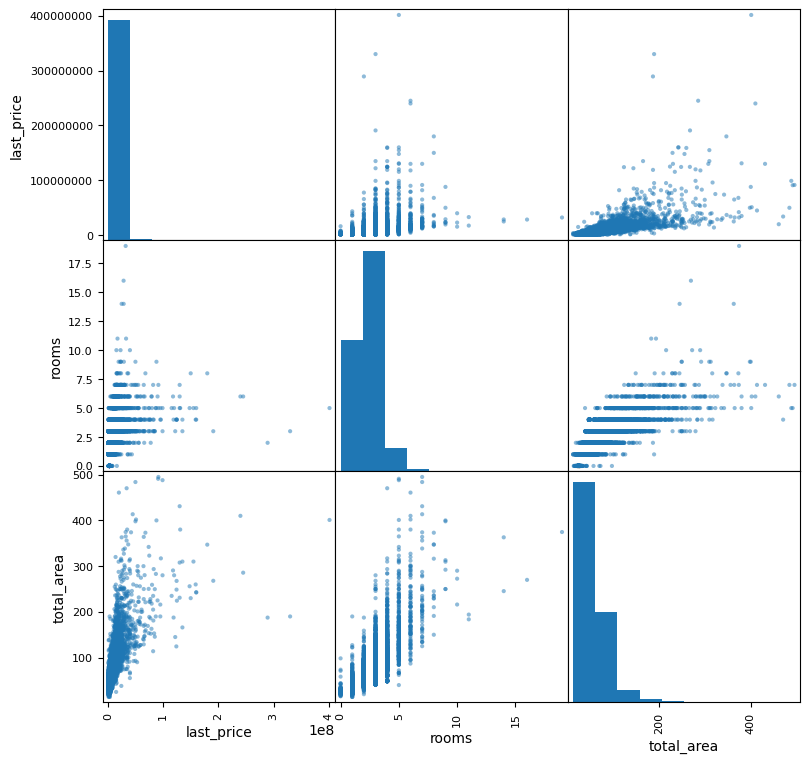

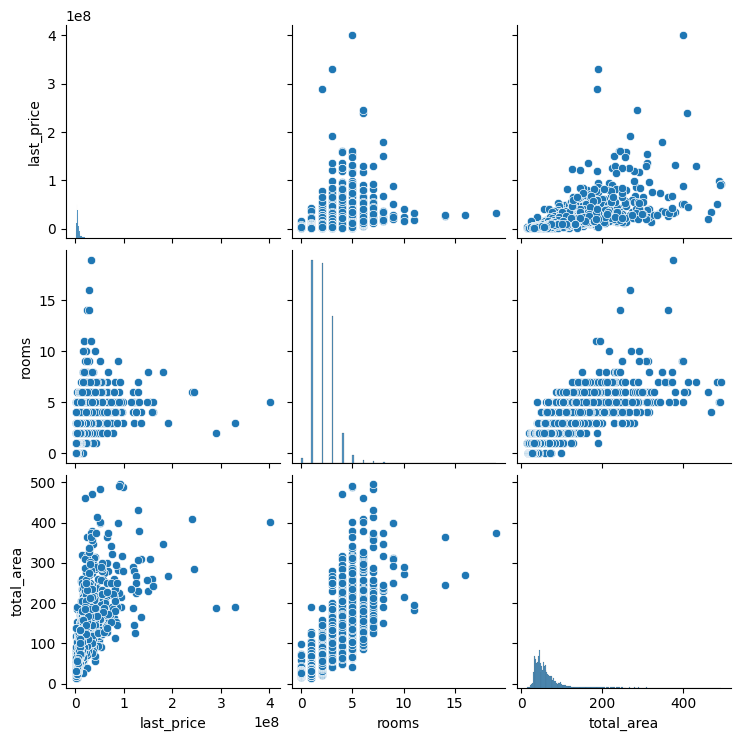

In [959]:
# Создадим DataFrame из столбцов 'last_price','rooms', 'total_area'
price_rooms_total_area = data[['last_price','rooms', 'total_area']]

pd.plotting.scatter_matrix(price_rooms_total_area, figsize=(9, 9)) # построим диаграммы рассеяния
sns.pairplot(price_rooms_total_area)

In [960]:
price_rooms_total_area.corr() # Посчитаем коэффициент корреляции

,last_price,rooms,total_area
last_price,1.000000,0.392075,0.675579
rooms,0.392075,1.000000,0.779784
total_area,0.675579,0.779784,1.000000


Из приведенных выше данных можно сделать следующий вывод:
* Стоимость квартиры зависит от ее общей площади (коэффициент корреляции почти 0,7). Диаграмма рассеяния показывает, что квартиры до 200 кв.м. обычно стоят в пределах 8 млн.рублей, дальнейшее увеличение площади незначительно влияет на увеличение цены, как и наоборот: встречаются варианты 200 кв.м. за 33 млн. рубней, так и в 600 кв.м. за 8 млн. рублей.
* Зависимость стоимости от количества комнат невысокая (коэффициент 0,4). Квартиры как с одной, так и с пятью комнатами могут иметь одинаковую стоимость. 

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


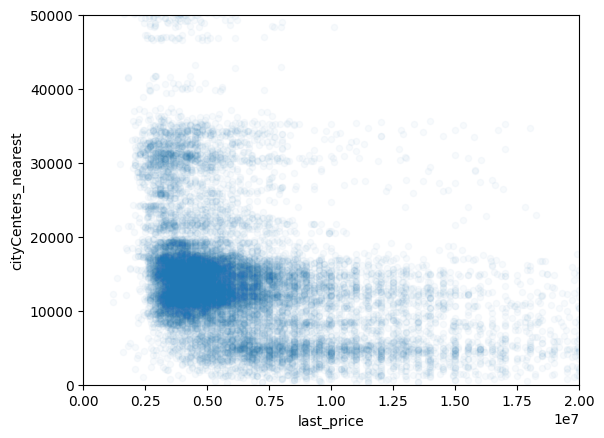

-0.23952417849987886

In [961]:
# Построим график зависимости 'last_price' от 'cityCenters_nearest'
data.plot(x='last_price', y='cityCenters_nearest', xlim=(0, 20000000), ylim=(0, 50000), kind='scatter', alpha=0.03)
plt.show()

data['last_price'].corr(data['cityCenters_nearest']) # проверим коэффициент корреляции

Из приведенных выше данных можно сделать следующий вывод:
* Коэффициент зависимости стоимости квартиры от расстояния до центра города отрицательный, это значит, что при увеличении расстояния уменьшается цена, и наоборот. В то же время данный показатель невысокий, а значит данная корреляция не слишком значима.
* На диаграмме заметна область высокой концентрации квартир стоимостью в интервале от 3 до 4 млн. рублей, расположенных на расстоянии от 9 до 18 километров от центра города. 

<Axes: xlabel='floor_category'>

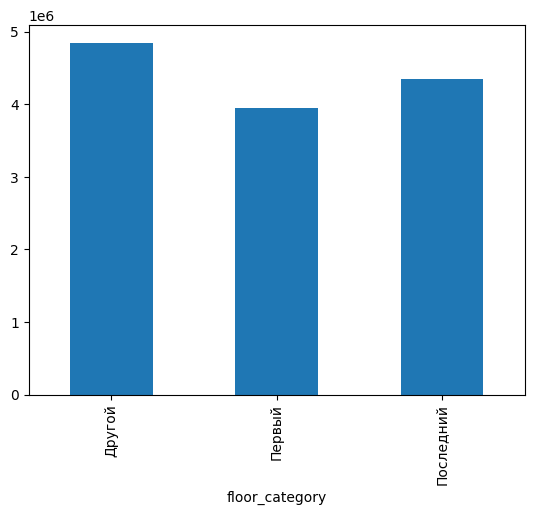

In [962]:
# Построим график зависимости 'last_price' от 'floor_category'

data.groupby('floor_category')['last_price'].median().plot(kind='bar')



Из приведенных выше данных можно сделать следующий вывод:
* Первый и последний этажи стоят дешевле, чем все остальные варианты. Причем первый этаж ценится меньше всего.

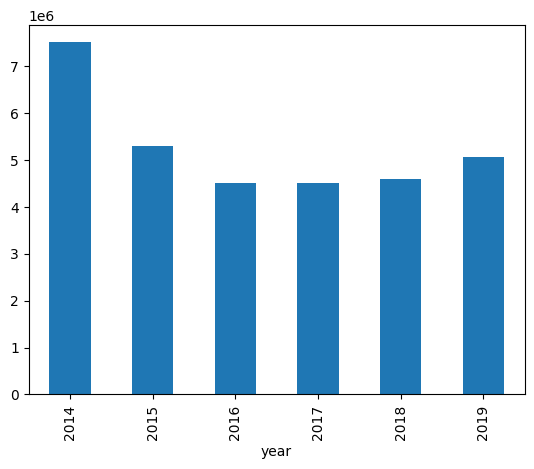

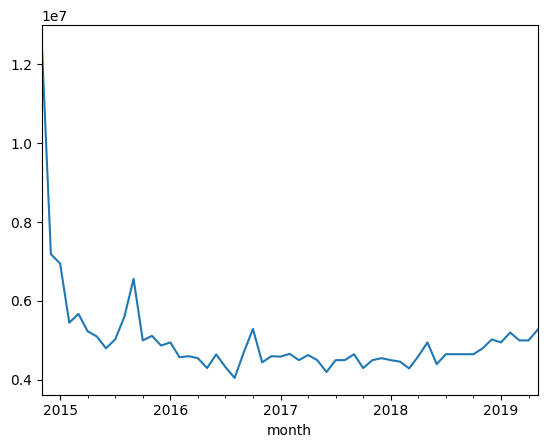

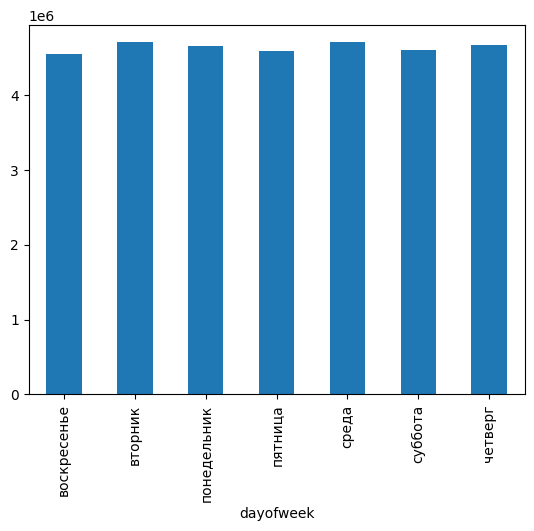

In [963]:
# Создадим DataFrame из столбцов 'last_price', 'year', 'month', 'day'
price_date = data[['last_price', 'year', 'month', 'day']]

col1 = data.groupby('year')['last_price'].median().plot(kind='bar')
plt.show()
col2 = data.groupby('month')['last_price'].median().plot()
plt.show()
col3 = data.groupby('dayofweek')['last_price'].median().plot(kind='bar')
plt.show()

Из приведенных выше данных можно сделать следующий вывод:
* Стоимость квартиры практически не зависит от даты размещения. Однако из всех параметров даты большая зависимость существует у года размещения, нежели чем у месяца или дня.
* Дороже всего квартиры стоили в 2017 и 2018 годах, в 2019 году стоимость немного упала.

### 4.5. Задача
<a name="fifth_issue"></a>
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [964]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений
data.pivot_table(index='locality_name', values='square_meter', aggfunc='count').sort_values(by='square_meter', ascending=False).head(10)

,square_meter
locality_name,
Санкт-Петербург,14573
Мурино,524
Кудрово,424
посёлок Шушары,404
Всеволожск,371
Пушкин,345
Колпино,328
посёлок Парголово,301
Гатчина,292


<Axes: xlabel='locality_name'>

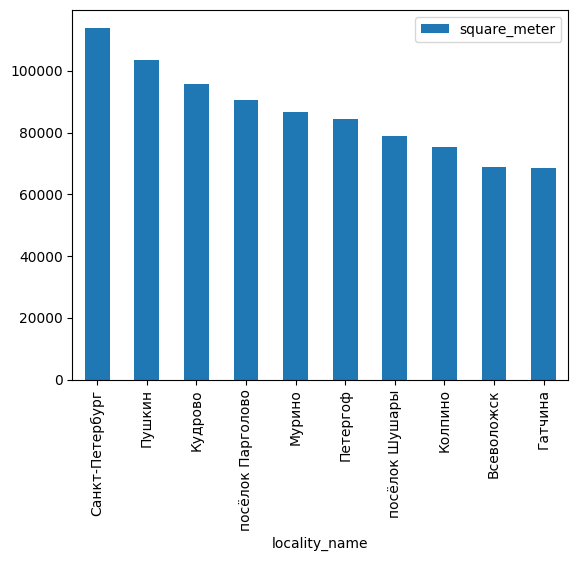

In [965]:
# Посчитаем среднюю цену квадратного метра в этих населённых пунктах
locality_list = ["Санкт-Петербург", "Мурино", "Кудрово","посёлок Шушары", "Всеволожск", "Пушкин", "Колпино", "посёлок Парголово", "Гатчина", "Петергоф"]
square_mean = (
    data.query('locality_name in @locality_list')
    .pivot_table(index='locality_name', values='square_meter')
    .sort_values(by='square_meter', ascending=False).head(10) 
)
square_mean.plot(kind = 'bar')

Из приведенных выше данных можно сделать следующий вывод:
* Самая высокая стоимость жилья — в Санкт-Петербурге и Пушкине. Самая низкая — во Всеволожске и Гатчине.

### 4.6. Задача
<a name="sixth_issue"></a>
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [966]:
spb_list = data.query('locality_name == "Санкт-Петербург"') # выделим квартиры в Санкт-Петербурге
# cоздадим столбец с расстоянием до центра в километрах: округлим до целых значений
spb_list['spb_center_km'] = (spb_list['cityCenters_nearest']/1000).round()
# посчитаем среднюю цену для каждого километра
spb_list['km_price'] = (spb_list['last_price']/spb_list['spb_center_km']).round()
spb_list.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_meter,year,month,day,dayofweek,floor_category,living_to_total_area,kitchen_to_total_area,spb_center_km,km_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,120370.37,2019,2019-03-01,3,четверг,Другой,0.47,0.23,16.0,812500.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,92785.71,2015,2015-08-01,3,четверг,Другой,0.61,0.15,14.0,371143.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,100000.00,2018,2018-06-01,1,вторник,Другой,0.32,0.41,8.0,1250000.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,True,...,88524.59,2017,2017-02-01,6,воскресенье,Другой,0.71,0.11,15.0,360000.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,True,...,127525.25,2017,2017-11-01,3,четверг,Другой,0.51,0.21,14.0,360714.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='spb_center_km', ylabel='km_price'>

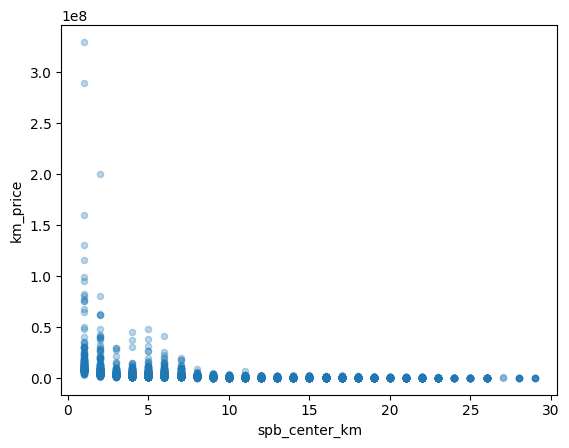

In [967]:
# Построим график зависимости 'km_price' от 'spb_center_km'
spb_list.plot(x='spb_center_km', y='km_price', kind = 'scatter', alpha=0.3)


График показывает, как цена зависит от удалённости от центра. Данные меняются в районе 8 км — это центральная зона.


### 4.7. Задача
<a name="seventh_issue"></a>
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [968]:
# Выделим сегмент квартир в центре
spb_center_list = spb_list.query('spb_center_km <= 8') 
spb_center_list.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_meter,year,month,day,dayofweek,floor_category,living_to_total_area,kitchen_to_total_area,spb_center_km,km_price
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,100000.00,2018,2018-06-01,1,вторник,Другой,0.32,0.41,8.0,1250000.0
24,8,6500000.0,97.2,2015-10-31,2,2.65,3.0,46.5,1,True,...,66872.43,2015,2015-10-01,5,суббота,Первый,0.48,0.20,2.0,3250000.0
35,6,15500000.0,149.0,2017-06-26,5,2.65,5.0,104.0,4,True,...,104026.85,2017,2017-06-01,0,понедельник,Другой,0.70,0.11,4.0,3875000.0
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,True,...,279503.11,2017,2017-10-01,1,вторник,Другой,0.24,0.31,7.0,6428571.0
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,2,True,...,86727.94,2017,2017-09-01,4,пятница,Последний,0.69,0.08,7.0,1685000.0


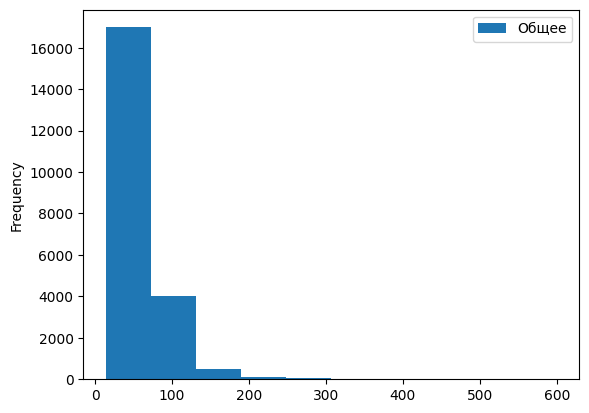

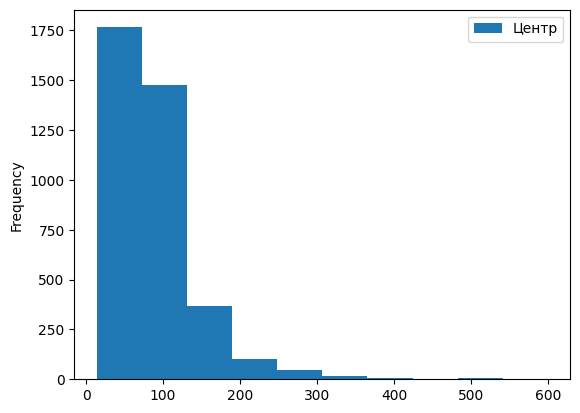

In [969]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

# сравним столбцы 'total_area' из общей базы данных и базы центра города
data['total_area'].plot(bins=10, range=(14, 600), kind='hist', label='Общее', legend=True) # построим гистограмму
plt.show()
spb_center_list['total_area'].plot(bins=10, kind='hist', range=(14, 600), label='Центр', legend=True) # построим гистограмму
plt.show()

# На графиках видно, что основная часть квартир из общей базы имеет площадь до 80 кв.м., 
# однако в центре города практически такую же долю занимают квартиры площадью от 70 до 120 кв.м.
# Кроме того, в центре гораздо выше доля квартир площадью от 130 до 190 кв.м.

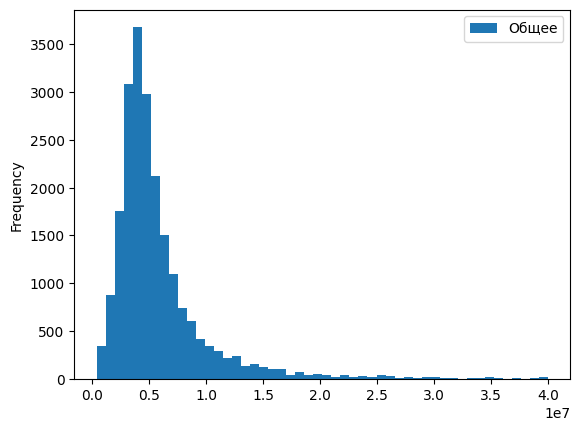

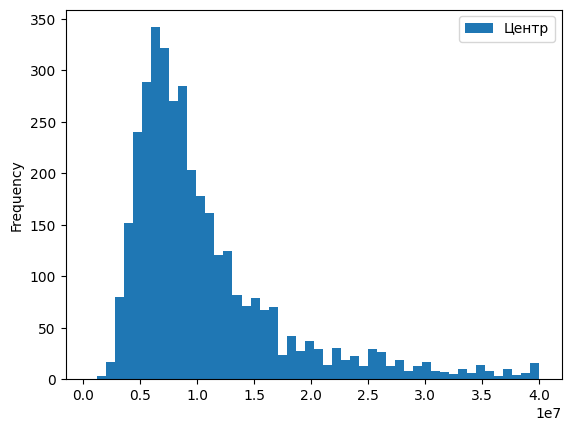

In [970]:
# сравним столбцы 'last_price' из общей базы данных и базы центра города
data['last_price'].plot(bins=50, kind='hist', range=(430000, 40000000), label='Общее', legend=True) # построим гистограмму
plt.show()
spb_center_list['last_price'].plot(bins=50, kind='hist', range=(430000, 40000000), label='Центр', legend=True) # построим гистограмму
plt.show()

# В общей базе пик стоимости приходится на 4 млн. рублей, а в центре города — на 6 млн.рублей.
# Также в центре гораздо больше вариантов стоимостью до 10 млн.рублей и выше, включая максимальные значения в 40 млн.рублей.

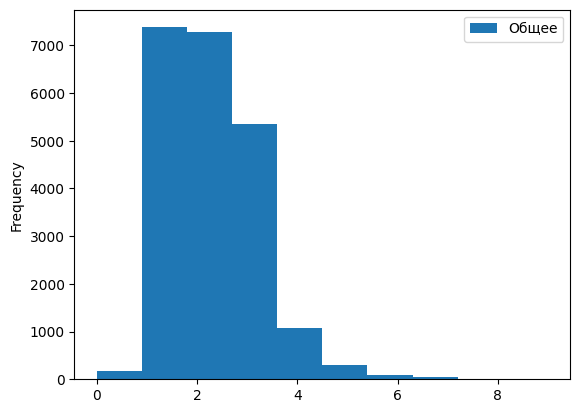

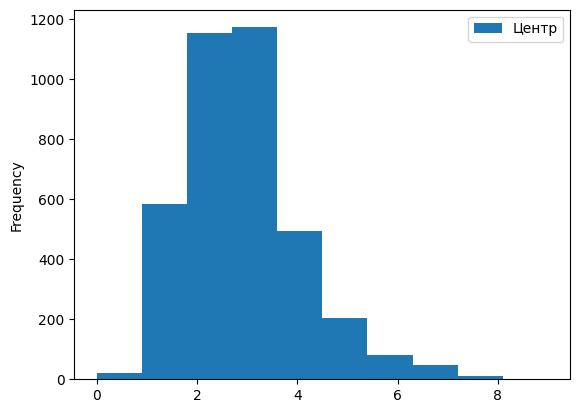

In [971]:
# сравним столбцы 'rooms' из общей базы данных и базы центра города
data['rooms'].plot(bins=10, kind='hist', range=(0, 9), label='Общее', legend=True)
plt.show()
spb_center_list['rooms'].plot(bins=10, kind='hist', range=(0, 9), label='Центр', legend=True) # построим гистограмму
plt.show()


# Графики указывают на то, что в центре города гораздно больше вариантов 3-4-комнатных квартир

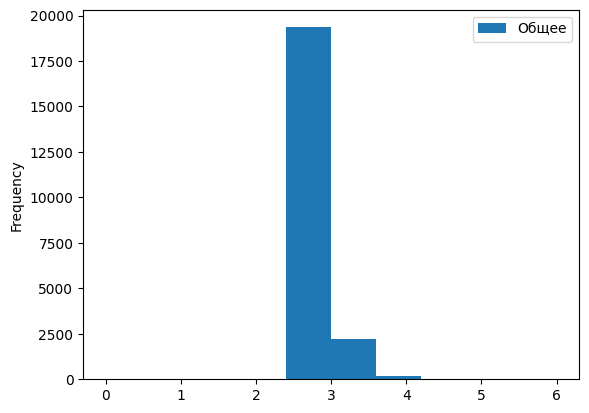

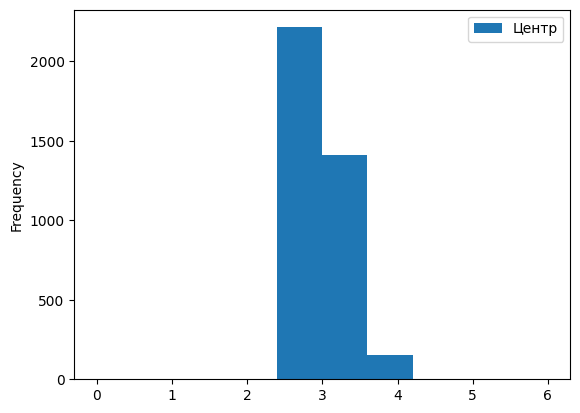

In [972]:
# сравним столбцы 'ceiling_height' из общей базы данных и базы центра города

data['ceiling_height'].plot(bins=10, kind='hist', range=(0, 6), label='Общее', legend=True) # построим гистограмму
plt.show()
spb_center_list['ceiling_height'].plot(bins=10, kind='hist', range=(0, 6), label='Центр', legend=True) # построим гистограмму
plt.show()

# Из графиков очевидно, что в центре города на порядок больше квартир с потолками 3-3,5 метра

Изучим факторы, которые влияют на стоимость квартиры (общая площадь, число комнат, этаж, удалённость от центра, дата размещения объявления).

array([[<Axes: xlabel='last_price', ylabel='last_price'>,
        <Axes: xlabel='rooms', ylabel='last_price'>,
        <Axes: xlabel='total_area', ylabel='last_price'>],
       [<Axes: xlabel='last_price', ylabel='rooms'>,
        <Axes: xlabel='rooms', ylabel='rooms'>,
        <Axes: xlabel='total_area', ylabel='rooms'>],
       [<Axes: xlabel='last_price', ylabel='total_area'>,
        <Axes: xlabel='rooms', ylabel='total_area'>,
        <Axes: xlabel='total_area', ylabel='total_area'>]], dtype=object)

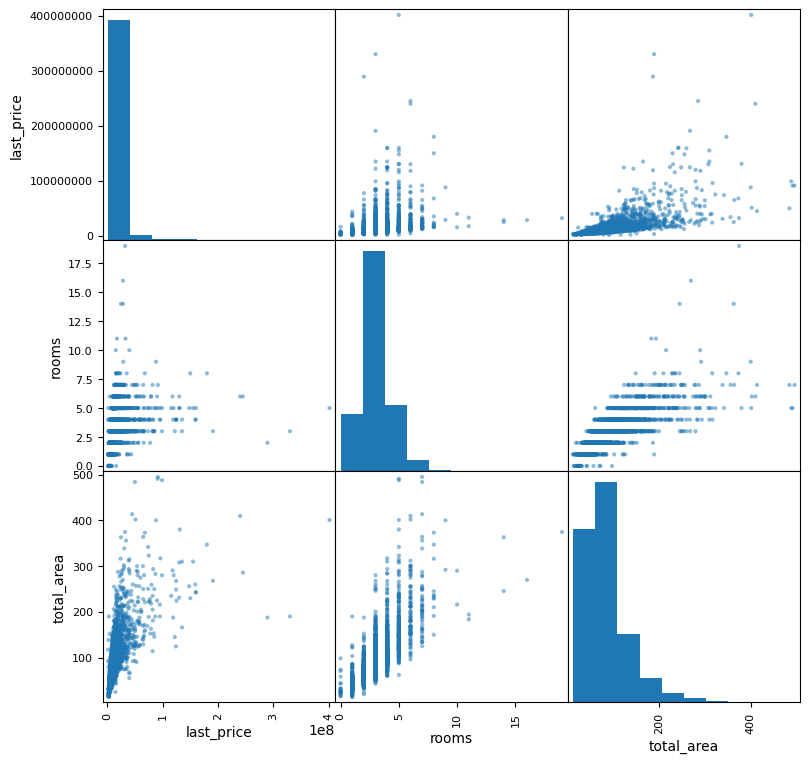

In [973]:
# Создадим DataFrame из столбцов 'last_price','rooms', 'total_area'
price_rooms_total_area_center = spb_center_list[['last_price','rooms', 'total_area']]

pd.plotting.scatter_matrix(price_rooms_total_area_center, figsize=(9, 9)) # построим диаграммы рассеяния

In [974]:
price_rooms_total_area_center.corr() # Посчитаем коэффициент корреляции

,last_price,rooms,total_area
last_price,1.000000,0.344369,0.645054
rooms,0.344369,1.000000,0.775732
total_area,0.645054,0.775732,1.000000


Из приведенных выше данных можно сделать следующий вывод:
* Стоимость квартиры, расположенной в центре города, также как и для квартиры из общей базы, зависит от ее общей площади (коэффициент корреляции почти 0,7). Диаграмма рассеяния показывает, что квартиры до 200 кв.м. обычно стоят в пределах 8 млн.рублей, дальнейшее увеличение площади незначительно влияет на увеличение цены, как и наоборот: встречаются варианты 200 кв.м. за 33 млн. рубней, так и в 600 кв.м. за 8 млн. рублей.
* Зависимость стоимости от количества комнат невысокая, но немного выше, чем для квартир из общей выборки (коэффициент 0,3).

,last_price,floor,spb_center_km
last_price,1.000000,0.083004,-0.107608
floor,0.083004,1.000000,0.273876
spb_center_km,-0.107608,0.273876,1.000000


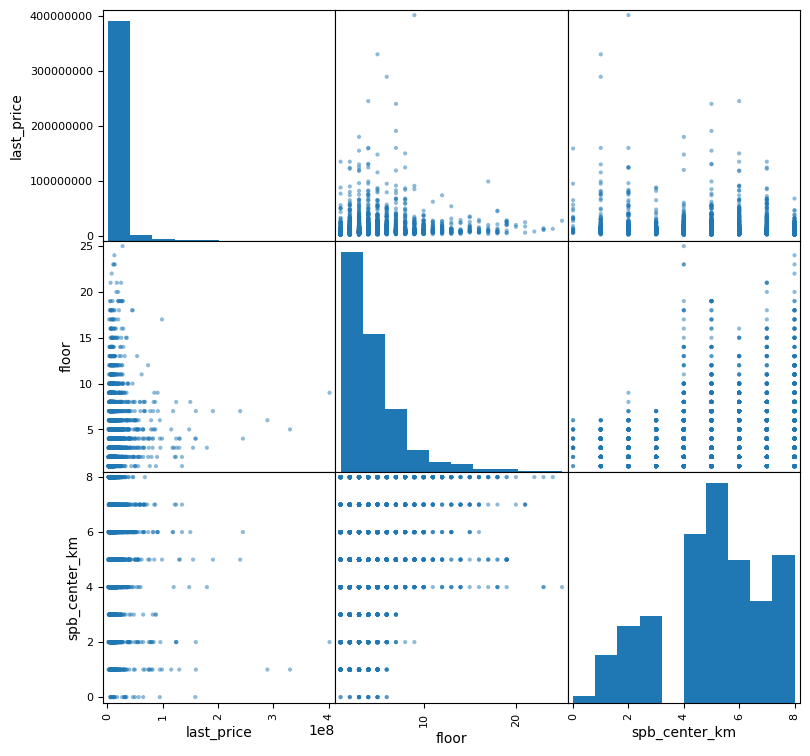

In [975]:
# Создадим DataFrame из столбцов 'last_price','floor', 'spb_center_km'
price_floor_day_center = spb_center_list[['last_price','floor', 'spb_center_km']]

pd.plotting.scatter_matrix(price_floor_day_center, figsize=(9, 9)) # построим диаграммы рассеяния

price_floor_day_center.corr() # Посчитаем коэффициент корреляции

Из приведенных выше данных можно сделать следующий вывод:
* Коэффициент зависимости стоимости квартиры от расстояния до центра города отрицательный, это значит, что при увеличении расстояния уменьшается цена, и наоборот. В то же время данный показатель невысокий, а значит данная корреляция не слишком значима, как и для квартир из общей базы.
* Квартиры, расположенные на расстоянии от 5 до 7 километров от центра города, стоят дороже, чем расположенные на расстоянии 3-4 км от центра. 
* Квартиры, расположенные на первом этаже, имеют большую по сравнению с вариантами из общей базы стоимость, такая недвижимость больше ценится в центре города. А квартиры на последних этажах наоборот стоят значительно дешевле.

,last_price,year,day
last_price,1.000000,-0.051148,0.011787
year,-0.051148,1.000000,-0.005961
day,0.011787,-0.005961,1.000000


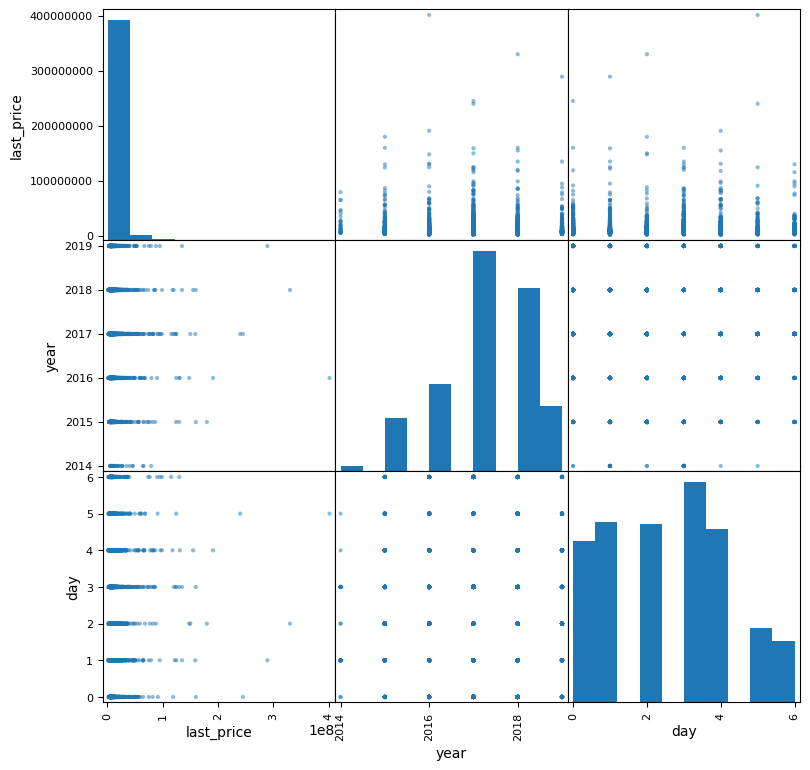

In [976]:
# Создадим DataFrame из столбцов 'last_price', 'year', 'month', 'day'
price_date_center = spb_center_list[['last_price', 'year', 'month', 'day']]

pd.plotting.scatter_matrix(price_date_center, figsize=(9, 9)) # построим диаграммы рассеяния
price_date_center.corr() # Посчитаем коэффициент корреляции

Из приведенных выше данных можно сделать следующий вывод:
* Стоимость квартиры практически не зависит от даты размещения. Однако из всех параметров даты большая зависимость существует у года размещения, нежели чем у месяца или дня.
* Дороже всего квартиры стоили в 2017 году, в 2018 и 2019 годах стоимость немного упала.

## 5. Общий вывод
<a name="sumup"></a>

Для определения рыночной стоимости объектов недвижимости необходимо было установить параметры, которые будут использованы для дальнейшего создания автоматизированной системы для отслеживания аномалий и мошеннической деятельности. Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

В ходе исследования мы проверили данные на ошибки и оценили их влияние на исследование. В данных были обнаружены пропуски, артефакты, а также явные и неявные дубликаты.

После устранения проблем в данных:

* заполнения пропущенных данных,
* обработки артефактов,
* изменения типов данных,

мы провели категоризацию данных, добавили в таблицу новые столбцы на основании представленных значений, а также провели исследовательский анализ.   

После изучения следующих параметров: площади, цены, числа комнат, высоты потолков, времени продажи квартиры, мы выяснили:
* Медианное время продажи квартиры 101 день, однако среднее — 175 дней. Большинство квартир продается за первые 30-60 дней, затем этот показатель постепенно уменьшается;
* Основная часть квартир имеет площадь не более 100 кв.м.; 
* Большинство квартир стоит в районе 5 млн.руб.;
* Вариантов с более чем 6 комнатами очень мало. В большей части квартир от 1 до 3 комнат;
* Высота потолков варьируется в диапазоне 2,5 - 3 метра.


Также мы определили, как разные факторы влияют на стоимость квартиры:
* Стоимость квартиры зависит от ее общей площади (коэффициент корреляции почти 0,7);
* Зависимость стоимости от количества комнат невысокая (коэффициент 0,3). Квартиры как с одной, так и с пятью комнатами могут иметь одинаковую стоимость;
* Коэффициент корреляции стоимости квартиры от расстояния до центра города отрицательный, это значит, что при увеличении расстояния уменьшается цена, и наоборот. В то же время данный показатель невысокий, а значит данная зависимость не слишком значима;
* Стоимость квартир на первом и последнем этажах ниже, чем остальных вариантов. Причем первый этаж ценится меньше всего;
* Стоимость квартиры практически не зависит от даты размещения. Однако из всех параметров даты большая зависимость существует у года размещения, нежели чем у месяца или дня.

Также на основании данных о расположении квартир мы выбрали 10 населённых пунктов с наибольшим числом объявлений, посчитали среднюю цену квадратного метра в этих населённых пунктах и выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья: 
* Самая высокая стоимость жилья — в Санкт-Петербурге и Пушкине. Самая низкая — во Всеволожске и Гатчине.

Помимо этого мы проанализировали данные о квартирах в центре города и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Анализ позволяет сделать следующие выводы: 
* Основная часть квартир из общей базы имеет площадь до 80 кв.м., однако в центре города практически такую же долю занимают квартиры площадью от 70 до 120 кв.м. Кроме того, в центре гораздо выше доля квартир площадью от 130 до 190 кв.м.;
* В общей базе пик стоимости приходится на 4 млн. рублей, а в центре города — на 6 млн.рублей. Также в центре гораздо больше вариантов стоимостью до 10 млн.рублей и выше, включая максимальные значения в 40 млн.рублей.
* В центре города гораздно больше вариантов 3-4-комнатных квартир;
* В центре города на порядок больше квартир с потолками 3-3,5 метра.

Затем мы выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Анализ позволяет сделать следующие выводы:
* Стоимость квартиры, расположенной в центре города, также как квартиры из общей базы, зависит от ее общей площади (коэффициент корреляции почти 0,7);
* Зависимость стоимости от количества комнат невысокая, но немного выше, чем для квартир из общей выборки (коэффициент 0,4 против 0,3);
* Коэффициент зависимости стоимости квартиры от расстояния до центра города отрицательный, это значит, что при увеличении расстояния уменьшается цена, и наоборот. В то же время данный показатель невысокий, а значит данная корреляция не слишком значима, как и для квартир из общей базы;
* Квартиры, расположенные на расстоянии от 5 до 7 километров от центра города, стоят дороже, чем расположенные на расстоянии 3-4 км от центра;
* Квартиры, расположенные на первом этаже, имеют большую по сравнению с вариантами из общей базы стоимость, такая недвижимость больше ценится в центре города. А квартиры на последних этажах наоборот стоят значительно дешевле;
* Стоимость квартиры практически не зависит от даты размещения. Однако из всех параметров даты большая зависимость существует у года размещения, нежели чем у месяца или дня.

На основании проведенного исследования мы можем сделать вывод, что приведенных данных достаточно для установки параметров автоматизированной системы отслеживания аномалий и мошеннической деятельности.

